In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from itertools import repeat
%matplotlib inline

In [43]:
def conv(s):
    if s == '':
        return np.nan
    return float(s.replace(',', '.'))

columns_to_conv = ['Нефть, т', 'Конденсат, т', 'Приемистость, м3/сут', 'Обводненность (вес), %', 'Нефть, м3', 'Жидкость, м3', \
                    'Дебит конденсата', 'Добыча растворенного газа, м3', 'Дебит попутного газа, м3/сут']
convertors = dict(zip(columns_to_conv, repeat(conv.__call__, len(columns_to_conv))))

In [114]:
df_train = pd.read_csv('init/1/train_1.8.csv', header = 0 ,encoding = 'cp1251', parse_dates = ['Дата'], converters= convertors)
df_test = pd.read_csv('init/1/test_1.9.csv', header = 0 ,encoding = 'cp1251', parse_dates = ['Дата'], converters= convertors)

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357 entries, 0 to 3356
Columns: 123 entries, Скважина to ГП - Общий прирост Qн
dtypes: datetime64[ns](1), float64(97), object(25)
memory usage: 3.2+ MB


In [4]:
df_coord_train = pd.read_csv('init/1/coords_train_1.1.csv', header = 0,encoding = 'cp1251')
df_coord_test = pd.read_csv('init/1/coords_test_1.1.csv', header = 0,encoding = 'cp1251')

In [5]:
df_frac_train = pd.read_csv('init/1/frac_train_1.csv', header = 0,encoding = 'cp1251')
df_frac_test = pd.read_csv('init/1/frac_test_1.csv', header = 0,encoding = 'cp1251')

In [6]:
df_gdis_train = pd.read_csv('init/1/gdis_train1.2.csv', header = 0,encoding = 'cp1251')
df_gdis_test = pd.read_csv('init/1/gdis_test1.2.csv', header = 0,encoding = 'cp1251')

In [49]:
df_coord['x'] = df_coord['ПЛАСТ_X'].astype(dtype='int32')
df_coord['y'] = df_coord['ПЛАСТ_Y'].astype(dtype='int32')
df_coord['x'] = df_coord['x'] - df_coord['x'].mean()
df_coord['y'] = df_coord['y'] - df_coord['y'].mean()

In [52]:
df_coord['x_head'] = df_coord['УСТЬЕ_X'].astype(dtype='int32')
df_coord['y_head'] = df_coord['УСТЬЕ_Y'].astype(dtype='int32')
df_coord['x_head'] = df_coord['x_head'] - df_coord['x_head'].mean()
df_coord['x_head'] = df_coord['x_head'] - df_coord['x_head'].mean()

<IPython.core.display.Javascript object>


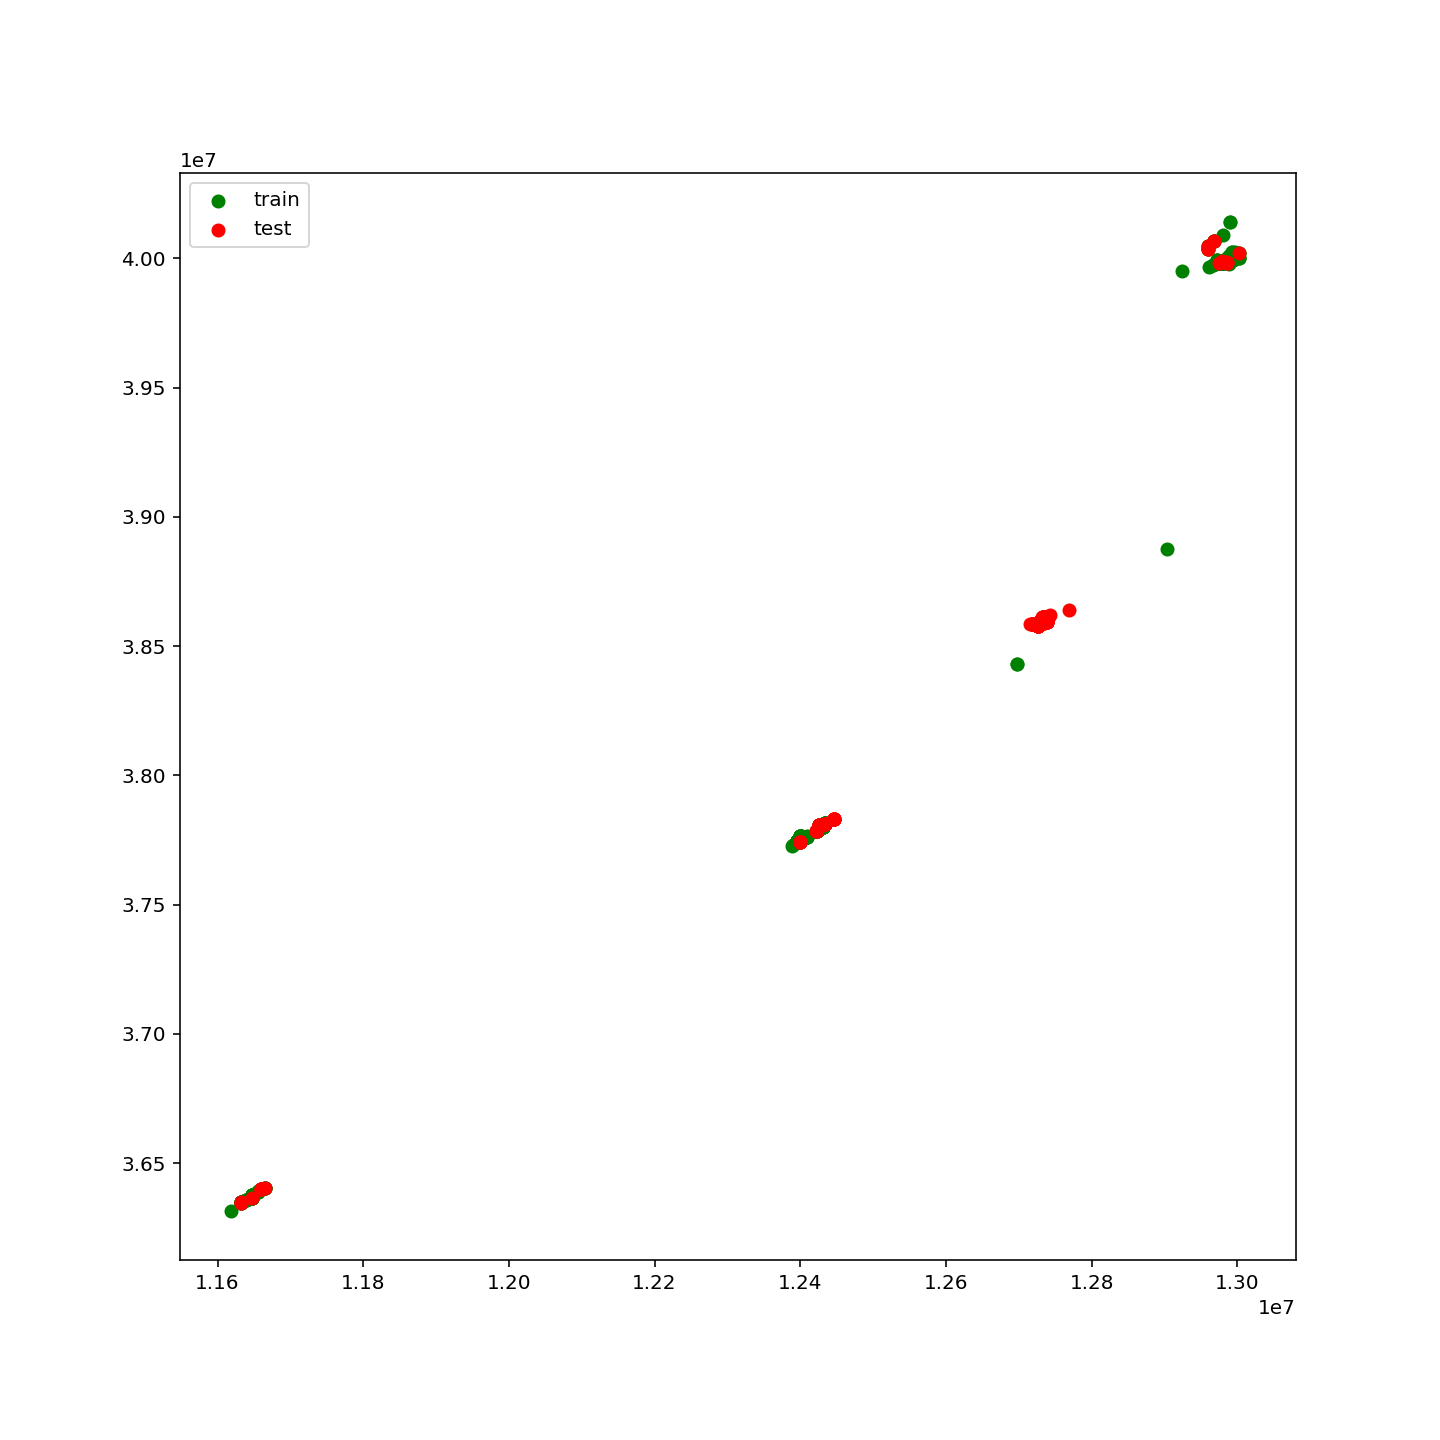

In [80]:
%matplotlib notebook
plt.figure(figsize=(10,10))
plt.scatter(df_coord_train.drop_duplicates('well_hash', 'first')['ПЛАСТ_X'], 
            df_coord_train.drop_duplicates('well_hash', 'first')['ПЛАСТ_Y'], color = 'g', label='train')
plt.scatter(df_coord_test.drop_duplicates('well_hash', 'first')['ПЛАСТ_X'], 
            df_coord_test.drop_duplicates('well_hash', 'first')['ПЛАСТ_Y'], color = 'r', label='test')
plt.legend()

In [74]:
w_coord_train = df_coord_train['well_hash'].unique()
w_coord_test = df_coord_test['well_hash'].unique()
w_train = df_train['Скважина'].unique()
w_test = df_test['Скважина'].unique()
w_frac_train = df_frac_train['Скважина'].unique()
w_frac_test = df_frac_test['Скважина'].unique()
w_gdis_train = df_gdis_train['Скважина'].unique()
w_gdis_test = df_gdis_test['Скважина'].unique()

In [81]:
print('# of wells in train: ', len(w_train))
print('# of wells in coord train: ', len(w_coord_train))
print('# of wells intersect train and coord train: ', len(list(set(w_train) & set(w_coord_train))))
print('# of wells in frac train: ', len(w_frac_train))
print('# of wells in gdis train: ', len(w_gdis_train))

# of wells in train:  563
# of wells in coord train:  234
# of wells intersect train and coord train:  233
# of wells in frac train:  490
# of wells in gdis train:  388


In [76]:
print('# of wells in test: ', len(w_test))
print('# of wells in coord test: ', len(w_coord_test))
print('# of wells in frac test: ', len(w_frac_test))
print('# of wells in gdis test: ', len(w_gdis_test))

# of wells in test:  266
# of wells in coord test:  137
# of wells in frac test:  193
# of wells in gdis test:  106


In [48]:
df_train.set_index(keys=['Скважина', 'Дата'])

ГТМ    Метод Характер работы  \
Скважина                         Дата                                       
53514b4c4150ad897d82dd7d42cfc1a5 2012-03-30  0.0  ЭЦН/ФОН             НЕФ   
                                 2012-04-30  0.0      ЭЦН             НЕФ   
                                 2012-05-30  0.0      ЭЦН             НЕФ   
                                 2012-06-30  0.0      ЭЦН             НЕФ   
                                 2012-07-31  0.0      ЭЦН             НЕФ   
                                 2012-08-30  0.0      ЭЦН             НЕФ   
fe017a547ac58cc7366a60cc6bcd3915 2013-08-31  NaN      NaN             NaN   
                                 2013-10-01  NaN      NaN             NaN   
                                 2013-10-31  NaN      NaN             NaN   
                                 2013-12-01  NaN      NaN             NaN   
                                 2014-01-01  NaN      NaN             NaN   
                                 2014-01-29  NaN      NaN             NaN   
8f3131afe66d3266c23142786786b265 2014-05-01  1.0      ФОН             НЕФ   
                                 2014-05-31  1.0  ЭЦН/ФОН             НЕФ   
                                 2014-07-01  0.0      ЭЦН             НЕФ   
                                 2014-08-01  0.0      ЭЦН             НЕФ   
                                 2014-08-31  NaN      NaN             NaN   
                                 2014-10-01  NaN      NaN             NaN   
cda627efd1549ecb72fa7931685d5aa3 2011-12-01  0.0  ЭЦН/ФОН             НЕФ   
                                 2012-01-01  0.0      ЭЦН             НЕФ   
                                 2012-01-29  0.0      ЭЦН             НЕФ   
                                 2012-02-29  0.0      ЭЦН             НЕФ   
                                 2012-03-30  0.0      ЭЦН             НЕФ   
                                 2012-04-30  0.0      ЭЦН             НЕФ   
3a64ba1b382ffeb0c514a4a569acff44 2011-10-01  0.0  ЭЦН/ФОН             НЕФ   
                                 2011-10-31  0.0      ЭЦН             НЕФ   
                                 2011-12-01  0.0      ЭЦН             НЕФ   
                                 2012-01-01  0.0      ЭЦН             НЕФ   
                                 2012-01-29  0.0      ЭЦН             НЕФ   
                                 2012-02-29  0.0      ЭЦН             НЕФ   
...                                          ...      ...             ...   
fc330f0bffba3e7b5a612199a98a1ce0 2013-07-01  1.0      ЭЦН             НЕФ   
                                 2013-08-01  1.0      ЭЦН             НЕФ   
                                 2013-08-31  1.0      ЭЦН             НЕФ   
                                 2013-10-01  0.0      ЭЦН             НЕФ   
                                 2013-10-31  0.0      ЭЦН             НЕФ   
                                 2013-12-01  0.0      ЭЦН             НЕФ   
1a41e8657c3273f16e0f6654d2bcdeba 2013-07-01  1.0      ЭЦН             НЕФ   
                                 2013-08-01  1.0      ЭЦН             НЕФ   
                                 2013-08-31  0.0      ЭЦН             НЕФ   
                                 2013-10-01  0.0      ЭЦН             НЕФ   
                                 2013-10-31  0.0      ЭЦН             НЕФ   
                                 2013-12-01  0.0      ЭЦН             НЕФ   
746b3e0604dcb2d11ffb73331506ac2a 2014-01-29  1.0      ЭЦН             НЕФ   
                                 2014-03-01  0.0      ЭЦН             НЕФ   
                                 2014-03-31  0.0      ЭЦН             НЕФ   
                                 2014-05-01  0.0      ЭЦН             НЕФ   
                                 2014-05-31  0.0      ЭЦН             НЕФ   
                                 2014-07-01  0.0      ЭЦН             НЕФ   
abe744fa00a0cb21c377d881a1355f59 2014-01-29  0.0      ЭЦН             НЕФ   
                                 2014-03-

In [47]:
df_train.columns[:5]

Index(['Скважина', 'Дата', 'ГТМ', 'Метод', 'Характер работы'], dtype='object')

In [115]:
df_train['oil_rate'] = df_train['Нефть, м3']/(df_train['Время работы, ч']/24)

In [116]:
df_train['liq_rate'] = df_train['Жидкость, м3']/(df_train['Время работы, ч']/24)

In [117]:
df_train.loc[df_train['liq_rate'].isnull(), 'liq_rate'] = df_train[df_train['liq_rate'].isnull()]['Дебит жидкости']

In [118]:
df_train.loc[df_train['oil_rate'].isnull(), 'oil_rate'] = df_train[df_train['oil_rate'].isnull()]['liq_rate'] \
                                                            *(1-df_train[df_train['oil_rate'].isnull()]['Обводненность']/100)

In [119]:
df_train.loc[:, 'Дата'] = df_train['Дата'].apply(conv_date)

In [120]:
df_train[['Скважина', 'Дата', 'liq_rate', 'oil_rate', 'Жидкость, м3', 'Нефть, м3', 'Время работы, ч', 'Дебит жидкости', 'Обводненность']]

,Скважина,Дата,liq_rate,oil_rate,"Жидкость, м3","Нефть, м3","Время работы, ч",Дебит жидкости,Обводненность
0,53514b4c4150ad897d82dd7d42cfc1a5,2012-04-01,75.083322,25.528505,941.67,320.17,301.0,NaN,NaN
1,53514b4c4150ad897d82dd7d42cfc1a5,2012-05-01,62.666667,41.177667,1880.00,1235.33,720.0,76.00,66.0
2,53514b4c4150ad897d82dd7d42cfc1a5,2012-06-01,56.548387,38.813548,1753.00,1203.22,744.0,63.00,36.0
3,53514b4c4150ad897d82dd7d42cfc1a5,2012-07-01,46.774194,33.405484,1450.00,1035.57,744.0,53.00,30.0
4,53514b4c4150ad897d82dd7d42cfc1a5,2012-08-01,42.000000,29.184667,1260.00,875.54,720.0,47.00,25.0
5,53514b4c4150ad897d82dd7d42cfc1a5,2012-09-01,36.935484,24.171613,1145.00,749.32,744.0,42.00,29.0
6,fe017a547ac58cc7366a60cc6bcd3915,2013-09-01,19.610000,4.902500,NaN,NaN,NaN,19.61,75.0
7,fe017a547ac58cc7366a60cc6bcd3915,2013-10-01,109.000000,31.610000,NaN,NaN,NaN,109.00,71.0
8,fe017a547ac58cc7366a60cc6bcd3915,2013-11-01,97.000000,65.960000,NaN,NaN,NaN,97.00,32.0
9,fe017a547ac58cc7366a60cc6bcd3915,2013-12-01,80.000000,53.600000,NaN,NaN,NaN,80.00,33.0


In [128]:
df_train_temp = df_train[['Скважина', 'Дата', 'liq_rate', 'oil_rate', 'Жидкость, м3', 'Нефть, м3', 'Время работы, ч', 'Дебит жидкости', 'Обводненность']]
#df_train_temp.loc[:,'Дата'] = df_train_temp['Дата'].asfreq('M')

In [129]:
wells_start = df_train_temp[df_train_temp['liq_rate'].isnull()]['Скважина'].unique().tolist()

In [130]:
df_train_temp[df_train_temp['Скважина']=='a2d46cb2c0cce62767b4cd7dacc28d1e']

,Скважина,Дата,liq_rate,oil_rate,"Жидкость, м3","Нефть, м3","Время работы, ч",Дебит жидкости,Обводненность
252,a2d46cb2c0cce62767b4cd7dacc28d1e,2005-12-01,NaN,NaN,0.0,0.0,0.0,NaN,NaN
253,a2d46cb2c0cce62767b4cd7dacc28d1e,2006-01-01,NaN,NaN,0.0,0.0,0.0,NaN,NaN
254,a2d46cb2c0cce62767b4cd7dacc28d1e,2006-02-01,32.363636,25.954545,712.0,571.0,528.0,NaN,NaN
255,a2d46cb2c0cce62767b4cd7dacc28d1e,2006-03-01,28.100000,23.066667,843.0,692.0,720.0,NaN,NaN
256,a2d46cb2c0cce62767b4cd7dacc28d1e,2006-04-01,21.290323,17.258065,660.0,535.0,744.0,NaN,NaN
257,a2d46cb2c0cce62767b4cd7dacc28d1e,2006-05-01,17.991465,14.304410,527.0,419.0,703.0,NaN,NaN


In [152]:
well = 'a2d46cb2c0cce62767b4cd7dacc28d1e'
df_well_train = df_train_temp[df_train_temp['Скважина'] == well].set_index('Дата')
df_well_train.index.rename('Дата', inplace=True)
start_index = df_well_train['liq_rate'].first_valid_index()
m_shift = start_index.to_period('M') - df_well_train.first_valid_index().to_period('M')
last_index = pd.Timestamp(df_well_train.last_valid_index(), freq = 'MS') + m_shift

df_well_train.reindex(index = pd.date_range(start_index, last_index, freq = 'MS')).fillna(method='ffill').reset_index()

,Скважина,liq_rate,oil_rate,"Жидкость, м3","Нефть, м3","Время работы, ч",Дебит жидкости,Обводненность
2006-02-01,a2d46cb2c0cce62767b4cd7dacc28d1e,32.363636,25.954545,712.0,571.0,528.0,NaN,NaN
2006-03-01,a2d46cb2c0cce62767b4cd7dacc28d1e,28.100000,23.066667,843.0,692.0,720.0,NaN,NaN
2006-04-01,a2d46cb2c0cce62767b4cd7dacc28d1e,21.290323,17.258065,660.0,535.0,744.0,NaN,NaN
2006-05-01,a2d46cb2c0cce62767b4cd7dacc28d1e,17.991465,14.304410,527.0,419.0,703.0,NaN,NaN
2006-06-01,a2d46cb2c0cce62767b4cd7dacc28d1e,17.991465,14.304410,527.0,419.0,703.0,NaN,NaN
2006-07-01,a2d46cb2c0cce62767b4cd7dacc28d1e,17.991465,14.304410,527.0,419.0,703.0,NaN,NaN


In [135]:
print(start_index)
print(last_index)

2006-02-01 00:00:00
2006-07-01 00:00:00


In [81]:
df_well_train['liq_rate'].first_valid_index().day

29

In [113]:
def conv_date(x):
    if x.day != 1:
        return (x + pd.offsets.MonthBegin(1))
    else:
        return x

In [89]:
df_well_train['Дата'].apply(conv_date)

252   2005-12-01
253   2006-01-01
254   2006-02-01
255   2006-03-01
256   2006-04-01
257   2006-05-01
Name: Дата, dtype: datetime64[ns]